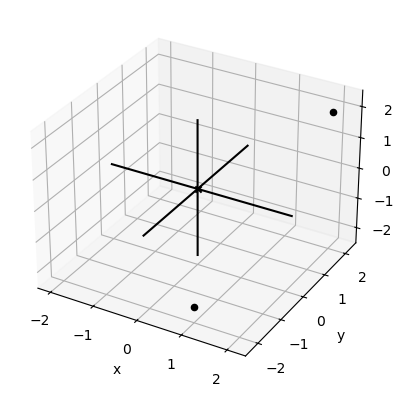

In [1]:
from draw3d import * 

draw3d(
    Points3D(
        (2, 2, 2),
        (1, -2, -2)
    )
)

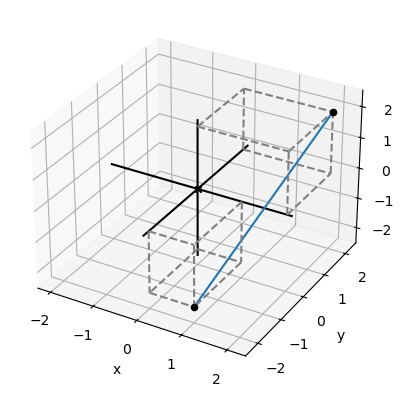

In [2]:
draw3d(
    Points3D(
        (2, 2, 2),
        (1, -2, -2)
    ),
    Segment3D(
        (2, 2, 2),
        (1, -2, -2),
    ),
    Box3D(2, 2, 2),
    Box3D(1, -2, -2),
)

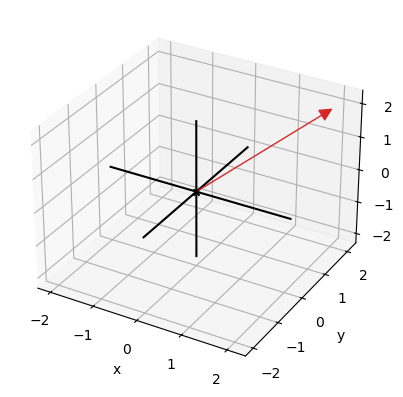

In [3]:
from draw3d import draw3d, Arrow3D

draw3d(
    Arrow3D((2, 2, 2)),
)

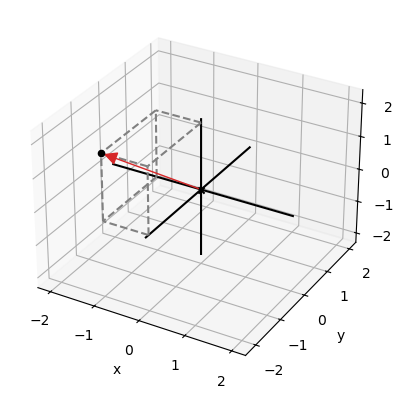

In [4]:
from draw3d import *

draw3d(
    Arrow3D((-1, -2, 2)),
    Points3D((-1, -2, 2)),
    Box3D(-1, -2, 2),
)

In [5]:
# 不限数量、不限维度的向量相加
# 此时的*表示可接收任意数量的vector
def add_all(*vectors):
    # 此时的*表示解包
    by_coords = zip(*vectors)
    return tuple([sum(coords) for coords in by_coords])

In [6]:
list(zip(*[(1, 2, 3), (4, 5, 6)]))

[(1, 4), (2, 5), (3, 6)]

In [7]:
from math import sqrt 

def length(vector):
    return sqrt(sum([coord**2 for coord in vector]))

In [8]:
length((3, 4, 12))

13.0

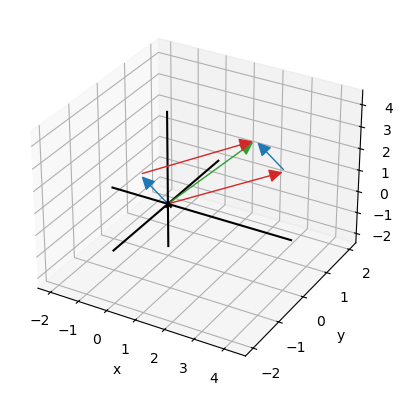

In [9]:
# 将（4, 0, 3） 和 (-1, 0, 1)绘制为Arrow3D，使它们在三维空间中以两种方式首尾相连

from vectors import *

a = (4, 0, 3)
b = (-1, 0, 1)
c = add(a, b)

draw3d(
    Arrow3D(a, color=red),
    Arrow3D(b, color=blue),
    Arrow3D(c, color=green),
    Arrow3D(tail=a, tip=c, color=blue),
    Arrow3D(tail=b, tip=c, color=red),
)

len(vectors) =  24


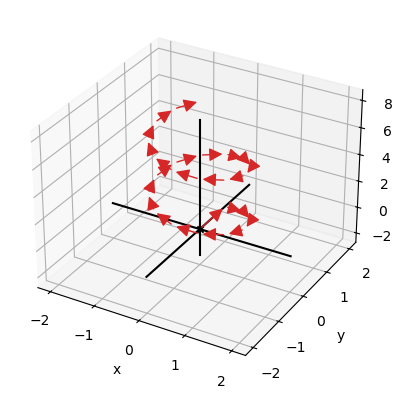

In [10]:
from math import sin, cos, pi 

vectors = [
    (sin(pi*t/6), cos(pi*t/6), 1.0*t/3) 
    for t in range(0, 24)
]

print("len(vectors) = ", len(vectors))

vectors = [(0, 0, 0)] + vectors

arrows = []
for i in range(1, len(vectors)):
    arrows.append(Arrow3D(tail=vectors[i-1], tip=vectors[i], color=red))

draw3d(*arrows)

In [11]:
# 
def scale(scalar, vector):
    return tuple(coord*scalar for coord in vector)

scale(2, (1, 2, 3))

(2, 4, 6)

# 点积

In [12]:
def dot(v1, v2):
    return sum(coord1*coord2 for coord1, coord2 in zip(v1, v2))

dot((1, 1, 1), (4, 5, 6))

15

In [13]:
print("dot((1, 1, 1), (4, 5, 6)) = ", dot((1, 1, 1), (4, 5, 6)))
print("dot((1, 0), (0, 1)) = ", dot((1, 0), (0, 1)))


dot((1, 1, 1), (4, 5, 6)) =  15
dot((1, 0), (0, 1)) =  0


## 点积的计算

* 对应元素相乘
* $uv=|u|*|v|*cos\theta$

推论：向量与自身的点积=向量长度的平方（因为此时$\theta=0$）

In [14]:
# 计算向量夹角
import math 

def angle_between(v1, v2):
    return math.acos(
        dot(v1, v2) / (length(v1)*length(v2))
    )

In [15]:
dot((-1,-1,1), (1,2,1))

-2

In [16]:
from math import pi 

angle_between((1,1,1), (-1,-1,1))*180/pi

109.47122063449069

# 向量积

向量积符合右手定则

向量积的长度等于一个平行四边形的面积

* $u \times v=|u|*|v|*sin\theta$


In [17]:
# 三维向量的向量积
def cross(u, v):
    ux,uy,uz = u
    vx,vy,vz = v
    return (uy*vz - uz*vy, uz*vx - ux*vz, ux*vy - uy*vx)
    

In [18]:
cross((1,1,0), (-2,-1,0))

(0, 0, 1)

In [19]:
cross((1,-2,1), (-6,12,-6))

(0, 0, 0)

## 在二维平面上渲染三维对象

In [20]:
# 渲染八面体
# 6个顶点、8个面，并且要区分哪些面是面向我们的，哪些不是
vectics = [
    (1, 0, 0),
    (0, 1, 0),
    (0, 0, 1),
    (-1, 0, 0),
    (0, -1, 0),
    (0, 0, -1),
]

octahedron = [
    [(1, 0, 0), (0, 0, -1), (0, 1, 0)],
    [(1, 0, 0), (0, 0, 1), (0, -1, 0)],
    [(-1, 0, 0), (0, 0, -1), (0, 1, 0)],
    [(-1, 0, 0), (0, 0, 1), (0, -1, 0)],
    [(0, 1, 0), (0, 0, 1), (1, 0, 0)],
    [(0, 1, 0), (0, 0, -1), (-1, 0, 0)],
    [(0, -1, 0), (0, 0, 1), (1, 0, 0)],
    [(0, -1, 0), (0, 0, -1), (-1, 0, 0)],
]

def get_vectics(faces):
    vectics = []
    for face in faces:
        for point in face:
            vectics.append(point)
    
    return list(set(vectics))

get_vectics(octahedron)


[(0, 1, 0), (0, -1, 0), (1, 0, 0), (-1, 0, 0), (0, 0, -1), (0, 0, 1)]

In [21]:

# component 利用点积提取向量在给定方向direction上的分量
def component(v , direction):
    return dot(v, direction) / length(direction)

print(component((1,2,3), (1, 0, 0)))
print(component((1,2,3), (0, 1, 0)))
print(component((1,2,3), (0, 0, 1)))


1.0
2.0
3.0


In [22]:
# 降维打击(x,y,z) -> (x,y)
def vector_to_2d(v):
    return component(v, (1, 0, 0)), component(v, (0, 1, 0))

vector_to_2d((1, 2, 3))


(1.0, 2.0)

In [23]:
def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]


In [24]:
# 返回单位向量
def unit(v):
    return scale(1/length(v), v)

In [25]:
# 返回面的单位法向量
def unit_normal(face):
    u = subtract(face[1], face[0])
    v = subtract(face[2], face[0])
    return unit(cross(u, v))

In [28]:
from draw2d import *

blues = matplotlib.colormaps['Blues']

def render(faces, light=(1,2,3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        # 计算面的单位法向量
        un = unit_normal(face)
        # 只有当向量的z分量是正的（指向观察者时），才会继续执行
        if un[2]>0: 
            c = color_map(1-
                          dot(un, unit(light))) # 发现向量和光源向量点积越大，阴影越少
            
            p = Polygon2D(*face_to_2d(face), fill=c, color=lines)
            polygons.append(p)

    draw2d(*polygons, axes=False, origin=False, grid=None)


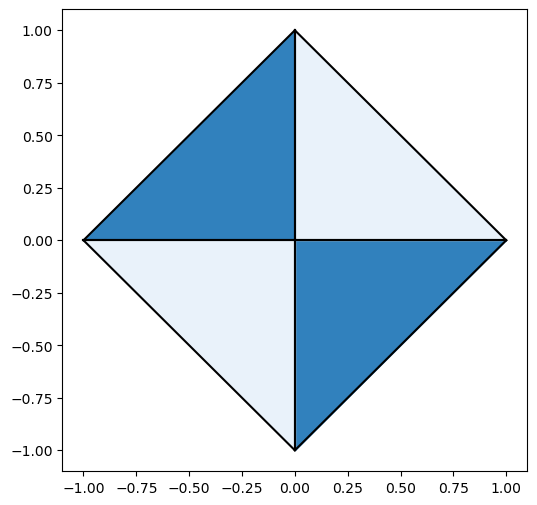

In [29]:
render(octahedron, color_map=blues, lines=black)